# Preprocessing

In [581]:
import pandas as pd
import numpy as np

df_dev = pd.read_csv('data/development.csv').set_index('Id')
df_eval = pd.read_csv('data/evaluation.csv').set_index('Id')

# We drop the sampling rate, which is the same value for all samples
# We drop the path, which is not useful for the regression task
df_dev.drop(['sampling_rate', 'path'], axis=1, inplace=True)
df_eval.drop(['sampling_rate', 'path'], axis=1, inplace=True)

# We convert the tempo to the float data type from the format '[float]'
df_dev['tempo'] = df_dev['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
df_eval['tempo'] = df_eval['tempo'].apply(lambda x: x.replace('[', '').replace(']', '')).astype('float')
df_dev['tempo'].dtype, df_eval['tempo'].dtype

df_dev.head(50)

,age,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration
Id,,,,,,,,,,,,,,,,,
0,24.0,female,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,151.999081,-123.999726,69,281,39,23.846893
1,22.5,female,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,129.199219,-86.928478,69,281,21,19.388662
2,22.0,female,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,117.453835,-98.450670,69,281,1,21.640998
3,22.0,female,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,117.453835,-56.459762,69,281,9,19.644127
4,22.0,male,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,112.347147,-80.349204,69,281,11,18.041905
5,33.0,female,italian,1258.52160,3998.8406,145.61612,0.025642,0.093994,0.014001,0.152036,2350.747577,123.046875,-93.453230,69,281,21,19.597642
6,18.0,male,french,1789.02590,3999.5728,145.42523,0.022059,0.138322,0.001402,0.177713,2771.793237,92.285156,-132.864988,69,281,29,21.849977
7,18.0,female,igbo,1042.95260,3989.9595,147.18710,0.013859,0.104579,0.000908,0.111858,2701.802811,215.332031,5.586937,4,16,1,1.367937
8,18.0,female,igbo,779.33765,2927.2144,157.62047,0.013921,0.080848,0.000324,0.039097,1448.093479,143.554688,-43.823950,0,0,1,1.989660


In [582]:
from collections import Counter
print(Counter(df_dev["gender"]))
print(Counter(df_eval["gender"]))

Counter({'female': 1468, 'male': 1465})
Counter({'male': 393, 'female': 297, 'famale': 1})


In [583]:
# import pandas as pd
# import numpy as np
# import os
# import librosa

# N=2
# ll = []
# index = []
# for f in os.listdir("data/audios_development"):
#     try: 
#         y, samplingRate = librosa.load(f"data/audios_development/{f}", sr=22050)
#         index.append(int(f.split(".")[0])-1)
#         ll.append(np.sort(np.abs(librosa.stft(y=y, n_fft=512)).mean(axis=1))[:-(N+1):-1])
#     except: pass
# df1 = pd.DataFrame(data=ll, index=index, columns=[f"FTT-{el+1}" for el in range(N)]).sort_index()

# ll = []
# index = []
# for f in os.listdir("data/audios_evaluation"):
#     try: 
#         y, samplingRate = librosa.load(f"data/audios_evaluation/{f}", sr=22050)
#         index.append(int(f.split(".")[0])-1)
#         ll.append(np.sort(np.abs(librosa.stft(y=y, n_fft=512)).mean(axis=1))[:-(N+1):-1])
#     except: pass
# df2 = pd.DataFrame(data=ll, index=index, columns=[f"FTT-{el+1}" for el in range(N)]).sort_index()

In [584]:
# df1.to_csv("data/FTT_development.csv")
# df2.to_csv("data/FTT_evaluation.csv")

In [585]:
# df_dev = pd.concat([df_dev, df1], axis=1)
# df_eval = pd.concat([df_eval, df2], axis=1)

In [586]:
# df_dev = df_dev[df_dev["age"]<=70]

Counter({18.0: 283, 19.0: 235, 21.0: 216, 20.0: 199, 17.0: 194, 22.0: 180, 23.0: 144, 24.0: 118, 26.0: 111, 25.0: 104, 16.0: 89, 29.0: 67, 31.0: 65, 28.0: 57, 27.0: 53, 32.0: 48, 35.0: 45, 30.0: 43, 38.0: 35, 43.0: 31, 15.0: 30, 39.0: 29, 33.0: 28, 36.0: 28, 37.0: 28, 34.0: 27, 52.0: 27, 42.0: 24, 50.0: 23, 40.0: 23, 53.0: 23, 47.0: 22, 46.0: 21, 44.0: 18, 45.0: 17, 48.0: 17, 54.0: 17, 41.0: 16, 57.0: 16, 60.0: 15, 56.0: 15, 49.0: 15, 62.0: 12, 55.0: 12, 51.0: 10, 59.0: 9, 63.0: 7, 65.0: 6, 66.0: 6, 68.0: 6, 64.0: 5, 58.0: 5, 84.0: 4, 69.0: 4, 70.0: 4, 74.0: 3, 71.0: 3, 73.0: 3, 77.0: 3, 67.0: 3, 76.0: 3, 81.0: 3, 72.0: 2, 61.0: 2, 78.0: 2, 75.0: 2, 80.0: 2, 86.0: 2, 79.0: 2, 82.0: 2, 22.5: 1, 7.0: 1, 83.0: 1, 27.5: 1, 15.5: 1, 85.0: 1, 88.0: 1, 90.0: 1, 97.0: 1, 6.0: 1})


<BarContainer object of 80 artists>

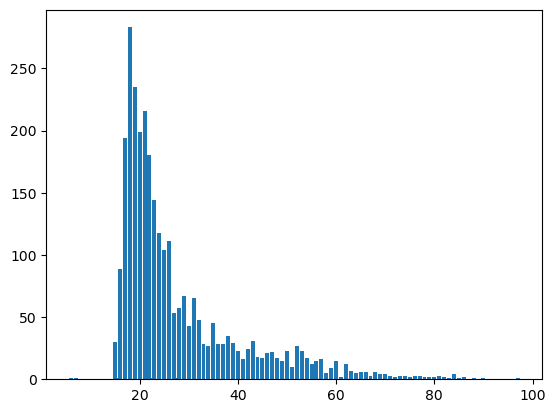

In [587]:
import matplotlib.pyplot as plt
from collections import Counter

temp = Counter(df_dev["age"])
print(temp)

plt.figure()
plt.bar(temp.keys(), temp.values())

Gender

In [588]:
print(df_dev['gender'].value_counts())
print(df_eval['gender'].value_counts())

gender
female    1468
male      1465
Name: count, dtype: int64
gender
male      393
female    297
famale      1
Name: count, dtype: int64


In [589]:
gender =  {'male': 1, 'female': 0, "famale": 0}

# We encode the gender using dummy encoding
df_dev['gender'] = df_dev['gender'].map(gender)
df_eval['gender'] = df_eval['gender'].map(gender)
print(df_dev['gender'].value_counts())
print(df_eval['gender'].value_counts())

gender
0    1468
1    1465
Name: count, dtype: int64
gender
1    393
0    298
Name: count, dtype: int64


Ethnicity

In [590]:
# set1 = set(df_dev["ethnicity"])
# set2 = set(df_eval["ethnicity"])
# set1.intersection(set2)

In [591]:
# from collections import defaultdict
# temp = defaultdict(lambda: 0)
# for el in df_eval["ethnicity"]:
#     if el in set1.intersection(set2):
#         temp[el] += 1

In [592]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15,15))
# plt.barh(temp.keys(), temp.values())

In [593]:
# # We keep only the `igbo` ethicity since it is the only ethnicity which is significantly present
# # in both the development and the evaluation dataset

# df_dev['igbo'] = df_dev['ethnicity'].apply(lambda z: 1 if z == 'igbo' else 0)
# df_dev.drop('ethnicity', axis=1, inplace=True)

# df_eval['igbo'] = df_eval['ethnicity'].apply(lambda z: 1 if z == 'igbo' else 0)
# df_eval.drop('ethnicity', axis=1, inplace=True)

Energy

In [594]:
# # We apply the log function to obtain a greater spread of values. 
# df_dev['energy'] = df_dev['energy'].apply(np.log)
# df_eval['energy'] = df_eval['energy'].apply(np.log)

Pitch

In [595]:
# df_dev.drop(["max_pitch","mean_pitch"], axis='columns', inplace=True)
# df_eval.drop(["max_pitch","mean_pitch"], axis="columns", inplace=True)

In [596]:
# print((df_dev["hnr"]>0).sum())
# print(df_dev["min_pitch"].count())
# print((df_eval["hnr"]>=0).sum())
# print(df_eval["min_pitch"].count())

In [597]:
# df_dev['jitter'] = df_dev['jitter'].apply(np.log)
# df_eval['jitter'] = df_eval['jitter'].apply(np.log)

# df_dev['shimmer'] = df_dev['shimmer'].apply(np.log)
# df_eval['shimmer'] = df_eval['shimmer'].apply(np.log)

# df_dev['min_pitch'] = df_dev['min_pitch'].apply(np.log)
# df_eval['min_pitch'] = df_eval['min_pitch'].apply(np.log)

# df_dev['zcr_mean'] = df_dev['zcr_mean'].apply(np.log)
# df_eval['zcr_mean'] = df_eval['zcr_mean'].apply(np.log)

# df_dev['spectral_centroid_mean'] = df_dev['spectral_centroid_mean'].apply(np.log)
# df_eval['spectral_centroid_mean'] = df_eval['spectral_centroid_mean'].apply(np.log)

# for el in range(N):
#     df_dev[f'FTT-{el+1}'] = df_dev[f'FTT-{el+1}'].apply(np.log)
#     df_eval[f'FTT-{el+1}'] = df_eval[f'FTT-{el+1}'].apply(np.log)

# df_dev["tempo"] = df_dev["tempo"].apply(lambda x: 1/x)
# df_eval["tempo"] = df_eval["tempo"].apply(lambda x: 1/x)

# df_dev['num_pauses'] = df_dev['num_pauses'].apply(np.log)
# df_eval['num_pauses'] = df_eval['num_pauses'].apply(np.log)

# df_dev['silence_duration'] = df_dev['silence_duration'].apply(np.log)
# df_eval['silence_duration'] = df_eval['silence_duration'].apply(np.log)

In [598]:
print((df_dev["energy"]>0).sum())
print(df_dev["energy"].count())
print((df_eval["energy"]>=0).sum())
print(df_eval["energy"].count())

2933
2933
691
691


In [599]:
df_dev.drop(["num_words", 'ethnicity', 'num_characters', 'num_pauses', 'spectral_centroid_mean'], axis='columns', inplace=True)
df_eval.drop(["num_words",  'ethnicity', 'num_characters', 'num_pauses', 'spectral_centroid_mean'], axis="columns", inplace=True)

df_dev.drop(columns=["min_pitch", "max_pitch"], inplace=True)
df_eval.drop(columns=["min_pitch", "max_pitch"], inplace=True)

In [600]:
df1 = pd.read_csv('data/development_processed.csv').set_index('Id')
df_dev = df_dev.join(df1[['mean_silence', 'silence_ratio', 'wps', "MFCC-1-50", "MFCC-2-50", "MFCC-3-50", "MFCC-4-50"]])

df2 = pd.read_csv('data/evaluation_processed.csv').set_index('Id')
df_eval = df_eval.join(df2[['mean_silence', 'silence_ratio', 'wps', "MFCC-1-50", "MFCC-2-50", "MFCC-3-50", "MFCC-4-50"]])   

# Model Selection

In [601]:
df_dev.head()

,age,gender,mean_pitch,jitter,shimmer,energy,zcr_mean,tempo,hnr,silence_duration,mean_silence,silence_ratio,wps,MFCC-1-50,MFCC-2-50,MFCC-3-50,MFCC-4-50
Id,,,,,,,,,,,,,,,,,
0,24.0,0,1821.6906,0.013795,0.082725,0.002254,0.210093,151.999081,-123.999726,23.846893,0.611459,0.679491,1.966079,-347.08936,56.410088,-10.904266,-0.697651
1,22.5,0,1297.8187,0.025349,0.096242,0.007819,0.078849,129.199219,-86.928478,19.388662,0.923270,0.831015,2.957402,-285.46402,126.210220,-1.447103,38.930620
2,22.0,0,1332.8524,0.019067,0.119456,0.002974,0.105365,117.453835,-98.450670,21.640998,21.640998,0.998759,3.184435,-289.10693,83.671350,18.288124,21.384052
3,22.0,0,1430.3499,0.017004,0.102389,0.022371,0.173701,117.453835,-56.459762,19.644127,2.182681,0.873967,3.069810,-232.12648,44.636555,23.314620,25.095451
4,22.0,1,1688.7234,0.028027,0.124831,0.005369,0.107279,112.347147,-80.349204,18.041905,1.640173,0.945083,3.614402,-256.97177,117.744080,-1.247027,32.655045


In [602]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

y_dev = df_dev["age"]
X_dev = df_dev.drop(columns=["age"])
X_dev.head()
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, random_state=0, test_size=0.2)
X_test = df_eval

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

<Axes: >

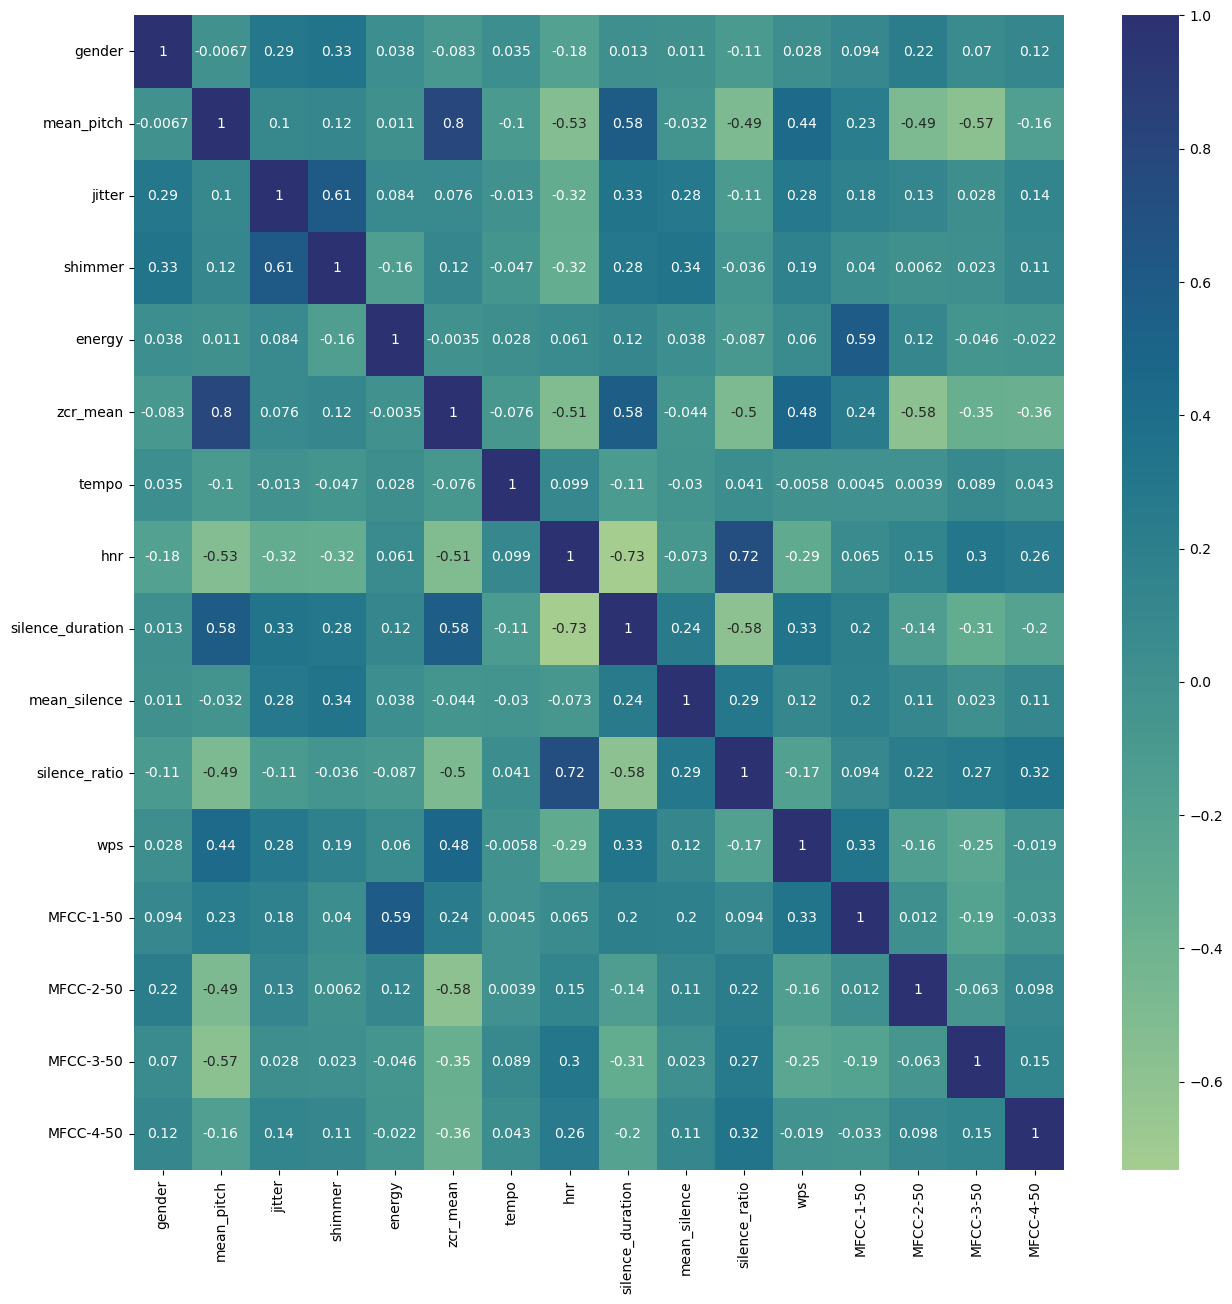

In [603]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(X_dev.corr(), cmap="crest", annot=True)

In [604]:
reg = RandomForestRegressor(random_state=0, n_jobs=-1, criterion="squared_error", n_estimators=200) # squared error since if small also RMSE is small

reg.fit(X_train,y_train)

y_pred = reg.predict(X_val)

from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_val, y_pred)

np.float64(10.090013293066512)

In [605]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

for model in [LinearRegression, Lasso, Ridge, RandomForestRegressor, SVR, DecisionTreeRegressor, KNeighborsRegressor, MLPRegressor]:
    reg = model()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f'{model.__name__} RMSE: {rmse}')

LinearRegression RMSE: 9.915977290267032
Lasso RMSE: 10.234286797288679
Ridge RMSE: 9.916018710817733
RandomForestRegressor RMSE: 10.138571361831202
SVR RMSE: 10.319635520554094
DecisionTreeRegressor RMSE: 13.769782114794946
KNeighborsRegressor RMSE: 10.868059574262114
MLPRegressor RMSE: 9.83701803104716


c:\Users\lucad\miniforge3\envs\dsl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Train on all

In [611]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import QuantileRegressor
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline   

y_dev = df_dev["age"]
X_dev = df_dev.drop(columns=["age"])
X_test = df_eval

ss = StandardScaler()
X_dev = ss.fit_transform(X_dev)
X_test = ss.transform(X_test)

# polynomial = PolynomialFeatures(2)
# X_dev = polynomial.fit_transform(X_dev)
# X_test = polynomial.transform(X_test)

# reg = LinearRegression()

reg = Ridge()
pipeline = Pipeline([
    ("feature_selection", RFE(Ridge())),
    # ("poly", PolynomialFeatures(2)),
    ("regression", KNeighborsRegressor())
])
# reg = RandomForestRegressor(n_jobs=-1, random_state=0)

grid = {
    "regression__n_neighbors": [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "regression__weights": ["uniform", "distance"],
    "feature_selection__n_features_to_select": list(range(5, X_dev.shape[1]+1, 1)),
}
gridSearch = GridSearchCV(pipeline, grid, n_jobs=-1, verbose=6, cv=5, scoring="neg_root_mean_squared_error")
gridSearch.fit(X_dev, y_dev)
reg = gridSearch.best_estimator_
print(gridSearch.best_estimator_)
print(gridSearch.best_params_)
print(gridSearch.best_score_)

y_pred = reg.predict(X_test)

Fitting 5 folds for each of 264 candidates, totalling 1320 fits
Pipeline(steps=[('feature_selection',
                 RFE(estimator=Ridge(), n_features_to_select=13)),
                ('regression',
                 KNeighborsRegressor(n_neighbors=20, weights='distance'))])
{'feature_selection__n_features_to_select': 13, 'regression__n_neighbors': 20, 'regression__weights': 'distance'}
-10.7877110942561


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import QuantileRegressor
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline   

y_dev = df_dev["age"]
X_dev = df_dev.drop(columns=["age"])
X_test = df_eval

ss = StandardScaler()
X_dev = ss.fit_transform(X_dev)
X_test = ss.transform(X_test)

# polynomial = PolynomialFeatures(2)
# X_dev = polynomial.fit_transform(X_dev)
# X_test = polynomial.transform(X_test)

# reg = LinearRegression()

reg = Ridge()
pipeline = Pipeline([
    ("feature_selection", RFE(Lasso())),
    ("poly", PolynomialFeatures(2)),
    ("regression", Ridge())
])
# reg = RandomForestRegressor(n_jobs=-1, random_state=0)

grid = {
    "regression__alpha": [0.1,1,10,100],
    "feature_selection__n_features_to_select": list(range(5, X_dev.shape[1]+1, 1)),
}
gridSearch = GridSearchCV(pipeline, grid, n_jobs=-1, verbose=6, cv=5, scoring="neg_root_mean_squared_error")
gridSearch.fit(X_dev, y_dev)
reg = gridSearch.best_estimator_
print(gridSearch.best_estimator_)
print(gridSearch.best_params_)
print(gridSearch.best_score_)

y_pred = reg.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Pipeline(steps=[('feature_selection',
                 RFE(estimator=Ridge(), n_features_to_select=16)),
                ('poly', PolynomialFeatures()),
                ('regression', Ridge(alpha=100))])
{'feature_selection__n_features_to_select': 16, 'regression__alpha': 100}
-10.606831919760285


In [612]:
selected_features = gridSearch.best_estimator_.named_steps['feature_selection'].get_support()
selected_feature_names = df_dev.drop(columns=["age"]).columns[selected_features]
print("Selected features:", selected_feature_names)

Selected features: Index(['gender', 'mean_pitch', 'jitter', 'shimmer', 'energy', 'hnr',
       'silence_duration', 'mean_silence', 'silence_ratio', 'wps', 'MFCC-1-50',
       'MFCC-2-50', 'MFCC-4-50'],
      dtype='object')


In [613]:
import pandas as pd

dataFrameOutput = pd.DataFrame({"Predicted": np.round(y_pred,2)})

dataFrameOutput.index.name = "Id"
dataFrameOutput.to_csv("./data/output.csv")